
**LGM VIP INTERNSHIP**
**DATA ANALYTICS INTERNSHIP**
**Develop A Neural Network That Can Read Handwriting**

**IMPORT LIBRARIES**

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [9]:
#load and split data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [10]:
#printing labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
x_train[0].shape

(28, 28)

In [12]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


**VARIOUS IMAGES OF HANDWRITTEN NUMBERS**

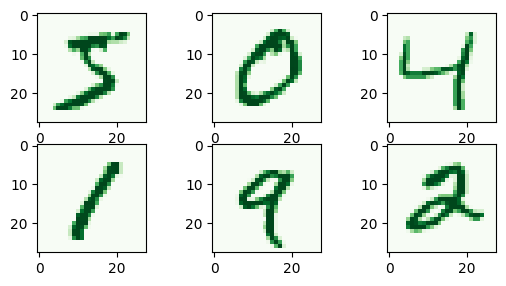

In [13]:
for i in range(6):
 plt.subplot(330 + 1 + i)
 plt.imshow(x_train[i], cmap=plt.get_cmap('Greens'))
plt.show()

**DATA PREPROCESSING**

In [14]:

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add channel dimension for CNN input
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [15]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [16]:
#augmentation of data
datagen = ImageDataGenerator(
    rotation_range=15,      # Rotate images up to 15 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10%
    height_shift_range=0.1, # Shift images vertically by up to 10%
    shear_range=0.2,        # Shear transformations
    zoom_range=0.2,         # Zoom in/out
    horizontal_flip=True    # Flip images horizontally
)

# Fit the generator on the training data
datagen.fit(x_train.reshape((-1, 28, 28, 1)))
augmented_iterator = datagen.flow(x_train.reshape((-1, 28, 28, 1)), y_train, batch_size=64)

In [17]:
augmented_iterator

**2D CNN MODEL**

In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=x_train[0].shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [19]:
model.fit(augmented_iterator, epochs=10, steps_per_epoch=len(x_train) // 64, validation_data=(x_test.reshape((-1, 28, 28, 1)), y_test))

Epoch 1/10
937/937 [==============================] - 37s 27ms/step - loss: 0.8791 - accuracy: 0.7011 - val_loss: 0.1454 - val_accuracy: 0.9532
Epoch 2/10
937/937 [==============================] - 26s 28ms/step - loss: 0.3912 - accuracy: 0.8784 - val_loss: 0.1032 - val_accuracy: 0.9666
Epoch 3/10
937/937 [==============================] - 25s 26ms/step - loss: 0.2904 - accuracy: 0.9118 - val_loss: 0.0738 - val_accuracy: 0.9745
Epoch 4/10
937/937 [==============================] - 24s 26ms/step - loss: 0.2438 - accuracy: 0.9294 - val_loss: 0.0566 - val_accuracy: 0.9807
Epoch 5/10
937/937 [==============================] - 24s 26ms/step - loss: 0.2123 - accuracy: 0.9393 - val_loss: 0.0583 - val_accuracy: 0.9800
Epoch 6/10
937/937 [==============================] - 24s 25ms/step - loss: 0.1885 - accuracy: 0.9444 - val_loss: 0.0490 - val_accuracy: 0.9846
Epoch 7/10
937/937 [==============================] - 24s 25ms/step - loss: 0.1701 - accuracy: 0.9512 - val_loss: 0.0533 - val_accuracy:

In [20]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 1s - loss: 0.0448 - accuracy: 0.9846 - 690ms/epoch - 2ms/step
Test accuracy: 0.9846000075340271


**ACCURACY : 98.46**

**PREDICTED VALUES FOR TEST INPUT**

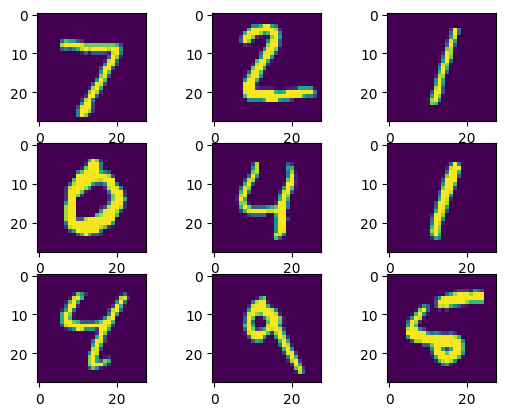

In [21]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i])

In [24]:
# Make predictions for the test images
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
# Print some example predictions
for i in range(10):
    print(f"Image {i+1} - Predicted digit: {predicted_classes[i]}")


313/313 [==============================] - 1s 2ms/step
Image 1 - Predicted digit: 7
Image 2 - Predicted digit: 2
Image 3 - Predicted digit: 1
Image 4 - Predicted digit: 0
Image 5 - Predicted digit: 4
Image 6 - Predicted digit: 1
Image 7 - Predicted digit: 4
Image 8 - Predicted digit: 9
Image 9 - Predicted digit: 5
Image 10 - Predicted digit: 9
